                                                Model Architecrture

This model accepts text data in form of sequences of words with each sequence having length of 200 words, and applies a binary classification on data to map each sequence to class 0/1. The size of word dictionary is set to 20K which means each word in input sequence is indicated by a number between 0 and 20000. The model architecture consists of one embedding layer followed by an average pooling layer over sequence length and a final dense layer to map each data instance to two dimensional vector for class probabilities. 


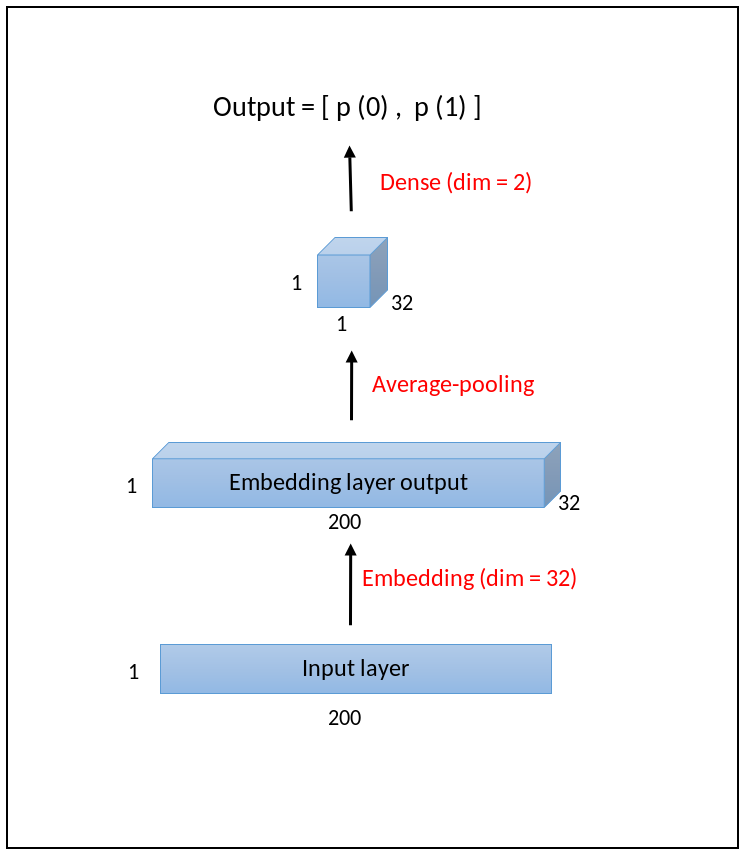

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


vocab_size = 20000  # Only consider the top 20k words
maxlen = 200  # Only consider the first 200 words of each sequence
(x_train, y_train), (x_val, y_val) = keras.datasets.imdb.load_data(num_words=vocab_size)
print(len(x_train), "Training sequences")
print(len(x_val), "Validation sequences")
x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_val = keras.preprocessing.sequence.pad_sequences(x_val, maxlen=maxlen)


25000 Training sequences
25000 Validation sequences


In [3]:
############################################################################### Training
embed_dim = 32  

inputs = layers.Input(shape=(maxlen,)) 

embedding_layer = layers.Embedding(input_dim=vocab_size, output_dim=embed_dim)
x = embedding_layer(inputs)

pool_layer = layers.GlobalAveragePooling1D( name = 'pool')
x = pool_layer(x)

outputs = layers.Dense(2, activation="softmax")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

print(model.summary())

model.compile("adam", "sparse_categorical_crossentropy", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=32, epochs=5, validation_data=(x_val, y_val))

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 200)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 200, 32)           640000    
_________________________________________________________________
pool (GlobalAveragePooling1D (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 2)                 66        
Total params: 640,066
Trainable params: 640,066
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5
782/782 [==============================] - 8s 11ms/step - loss: 0.5539 - accuracy: 0.7742 - val_loss: 0.4103 - val_accuracy: 0.8489
Epoch 2/5
782/782 [==============================] - 8s 11ms/step - loss: 0.3267 - accuracy: 0.8812 - val_

In [4]:
############################################################################### Testing

print ('........................... sample data (first sequence in validation set).............................\n')
print('data class label = ', str( y_val[0]) + '\n')
print('input shape  =  ' + str(inputs.shape) + '\n')
print( x_val[0,:])


# .............................................................................
print ('\n....................... embedding layer .....................\n')
print('embedding layer shape  =  ' + str(x.shape))

layer_name = 'embedding'

intermediate_layer_model = keras.Model(inputs=model.input,outputs=model.get_layer(layer_name).output)
out_embedding = intermediate_layer_model.predict(x_val[0:1,:])
print(out_embedding)


# .............................................................................
print ('\n....................... average_pool layer .....................\n')
print('Pool layer shape  =  ' + str(x .shape) + '\n')

layer_name = 'pool'

intermediate_layer_model = keras.Model(inputs=model.input,outputs=model.get_layer(layer_name).output)
out_averagepool = intermediate_layer_model.predict(x_val[0:1,:])
print(out_averagepool)

# .............................................................................
print ('\n....................... dense layer ............................\n')
print('Dense layer shape  =  ' + str(outputs.shape)+ '\n')
layer_name = 'dense'

intermediate_layer_model = keras.Model(inputs=model.input,outputs=model.get_layer(layer_name).output)
out_dense = intermediate_layer_model.predict(x_val[0:1,:])
print(out_dense)

........................... sample data (first sequence in validation set).............................

data class label =  0

input shape  =  (None, 200)

[    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     1   591   202    14    31     6   7